/scr/aliang80/miniconda3/envs/jax2/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:131: UserWarning: WARN: The obs returned by the `reset()` method was expecting a numpy array, actual type: <class 'list'>
  logger.warn(
/scr/aliang80/miniconda3/envs/jax2/lib/python3.11/site-packages/gymnasium/spaces/box.py:240: UserWarning: WARN: Casting input x to numpy array.
  gym.logger.warn("Casting input x to numpy array.")


{'observation': array([-1.24173618, -1.84336488,  0.        ,  0.        ]), 'achieved_goal': array([-1.24173618, -1.84336488]), 'desired_goal': array([0.88489336, 0.77048676]), 'meta': [3, 3, 5, 3, 3]}


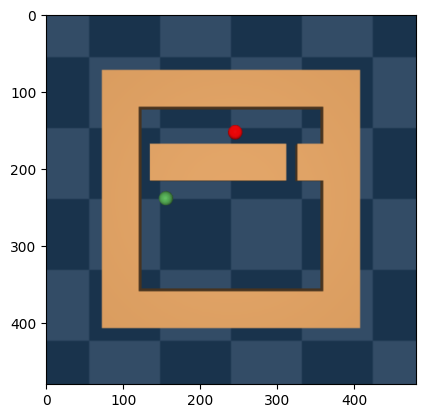

In [1]:
from changepoint_aug.density_estimation.utils import make_env
import matplotlib.pyplot as plt
import numpy as np

env = make_env(
    "MAZE",
    "",
    0,
    max_episode_steps=1000,
)
obs, _ = env.reset(seed=0)
print(obs)
obs2, _ = env.reset()
img = env.render()
plt.imshow(img)

Dict('achieved_goal': Box(-inf, inf, (2,), float64), 'desired_goal': Box(-inf, inf, (2,), float64), 'meta': Box(-9223372036854775806, 9223372036854775805, (5,), int64), 'observation': Box(-inf, inf, (4,), float64))
{'observation': array([-1.83785863,  2.0082028 ,  0.        ,  0.        ]), 'achieved_goal': array([-1.83785863,  2.0082028 ]), 'desired_goal': array([2.04104832, 0.20012561]), 'meta': [2, 2, 5, 2, 1]}


/scr/aliang80/miniconda3/envs/jax2/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:131: UserWarning: WARN: The obs returned by the `reset()` method was expecting a numpy array, actual type: <class 'list'>
  logger.warn(
/scr/aliang80/miniconda3/envs/jax2/lib/python3.11/site-packages/gymnasium/spaces/box.py:240: UserWarning: WARN: Casting input x to numpy array.
  gym.logger.warn("Casting input x to numpy array.")


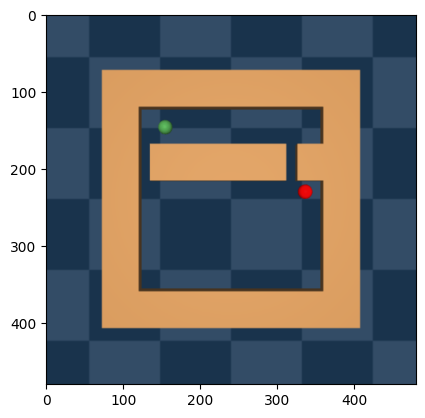

In [41]:
from ml_collections import ConfigDict

config = ConfigDict(
    dict(env="MAZE", env_id="PointMaze_UMazeDense-v3", seed=0, max_episode_steps=1000)
)

env = make_env(
    config.env,
    config.env_id,
    config.seed,
    maze_map="all_goals",
    max_episode_steps=config.max_episode_steps,
    freeze_rand_vec=False,
)
print(env.observation_space)
state, _ = env.reset()
print(state)
img = env.render()
plt.imshow(img)

/scr/aliang80/miniconda3/envs/jax2/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:131: UserWarning: WARN: The obs returned by the `reset()` method was expecting a numpy array, actual type: <class 'list'>
  logger.warn(
/scr/aliang80/miniconda3/envs/jax2/lib/python3.11/site-packages/gymnasium/spaces/box.py:240: UserWarning: WARN: Casting input x to numpy array.
  gym.logger.warn("Casting input x to numpy array.")
/scr/aliang80/miniconda3/envs/jax2/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.reset_to_state to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.reset_to_state` for environment variables or `env.get_wrapper_attr('reset_to_state')` that will search the reminding wrappers.
  logger.warn(
/scr/aliang80/miniconda3/envs/jax2/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:131: UserWarning: WARN: The obs returned by the `step()` method wa

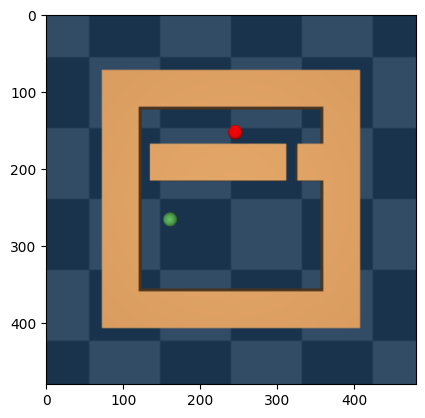

In [21]:
env = make_env(
    "MAZE",
    "",
    0,
    max_episode_steps=1000,
)
obs, _ = env.reset(seed=0)
state = np.concatenate([v for k, v in obs2.items() if k != "achieved_goal"])
env.reset_to_state(state)
for _ in range(100):
    env.step(env.action_space.sample())
img = env.render()
plt.imshow(img)

# MetaWorld

In [33]:
env = make_env(
    "MW",
    "button-press-v2",
    0,
    max_episode_steps=1000,
    freeze_rand_vec=False
)
state1, _ = env.reset()
actions = []
for _ in range(10):
    actions.append(env.action_space.sample())
    env.step(actions[-1])
# print(state1)
# state1, _ = env.reset(seed=0)
# print(state1)
# env_state = env.get_env_state()
    
state1 = env.get_obs()

# obs = env.render()

# env2 = make_env(
#     "MW",
#     "button-press-v2",
#     1,
#     max_episode_steps=1000,
#     freeze_rand_vec=False
# )
# state2, _ = env2.reset(seed=12)
# # state2, _ = env2.reset(seed=5)
# # state2, _ = env2.reset()
# # env2.set_env_state(env_state)   
# # env2.step(env.action_space.sample())
# # state3 = env2.get_obs()
# print(state1[-3:], state2[-3:])

# print(state1[:20], state2[:20], state3[:20])
# for _ in range(100):
#     env2.step(env2.action_space.sample())

# state2_tmp = env2.get_obs()
# env2.set_env_state(env_state)   
# state2_go = env2.get_obs()
# # state2 = env2.step(env.action_space.sample())
# # for action in actions:
# #     env2.step(action)

# obs2 = env2.render()

# print(state1, state2, state2_tmp)

# print((obs == obs2).all())


[ 0.00591636  0.39968333  0.19493164  1.         -0.09669447  0.6976635
  0.115       1.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.00591636  0.39968333  0.19493164  1.         -0.09669447  0.6976635
  0.115       1.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.09669447  0.7906635   0.115     ]


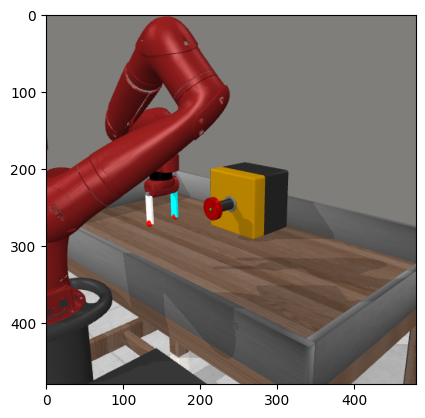

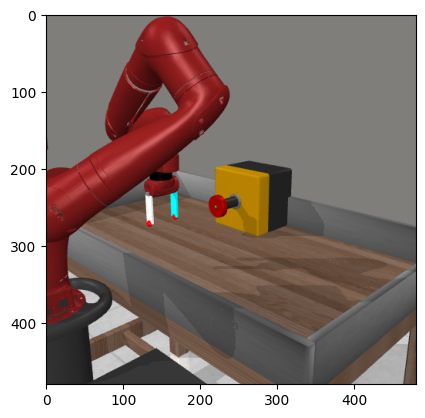

In [52]:
# img = env.render()
img = np.flip(obs, axis=0)
fig = plt.figure()
plt.imshow(img)

img = np.flip(obs2, axis=0)
fig = plt.figure()
plt.imshow(img)

In [42]:
env2 = make_env(
    "MW",
    "button-press-v2",
    0,
    max_episode_steps=1000,
    freeze_rand_vec=False
)
env2.seed(seed=0)
env2.reset()
env2.reset()

(array([ 0.00591636,  0.39968333,  0.19493164,  1.        , -0.09669447,
         0.6976635 ,  0.115     ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.00591636,  0.39968333,
         0.19493164,  1.        , -0.09669447,  0.6976635 ,  0.115     ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.09669447,  0.7906635 ,  0.115     ]),
 {})

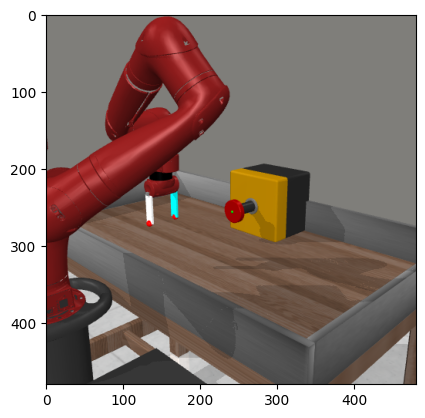

In [8]:
img = env.render()
img = np.flip(img, axis=0)
plt.imshow(img)

In [62]:
env2.reset()

(array([0.00591636, 0.39968333, 0.19493164, 1.        , 0.0097627 ,
        0.69275946, 0.115     , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00591636, 0.39968333,
        0.19493164, 1.        , 0.0097627 , 0.69275946, 0.115     ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.0097627 , 0.78575946, 0.115     ]),
 {})